<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix


Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 370 (delta 63), reused 94 (delta 33), pack-reused 235
Receiving objects: 100% (370/370), 9.39 MiB | 26.71 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
df_all = preprocessing.get_data()

# **Random Forest Classifier**

In [ ]:
df_forest = preprocessing.rforest_preproc(df_all)

In [ ]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_forest.drop('volveria', 1), df_forest['volveria'])

In [ ]:
model_rfr = RandomForestClassifier(max_depth=5)

In [ ]:
model_rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

El score general del modelo es 0.8208955223880597
La media del cross validation score con k=10 es 0.8166666666666667
El accuracy del modelo es 0.8208955223880597
La precision del modelo es 0.851063829787234
El recall del modelo es 0.5797101449275363
El f1 del modelo es 0.689655172413793


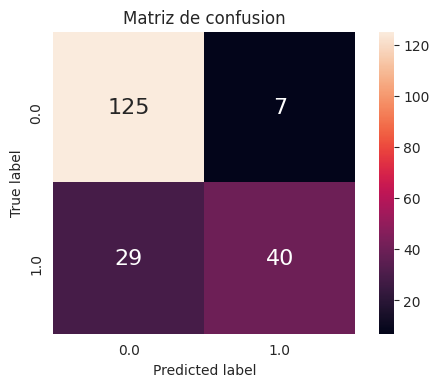

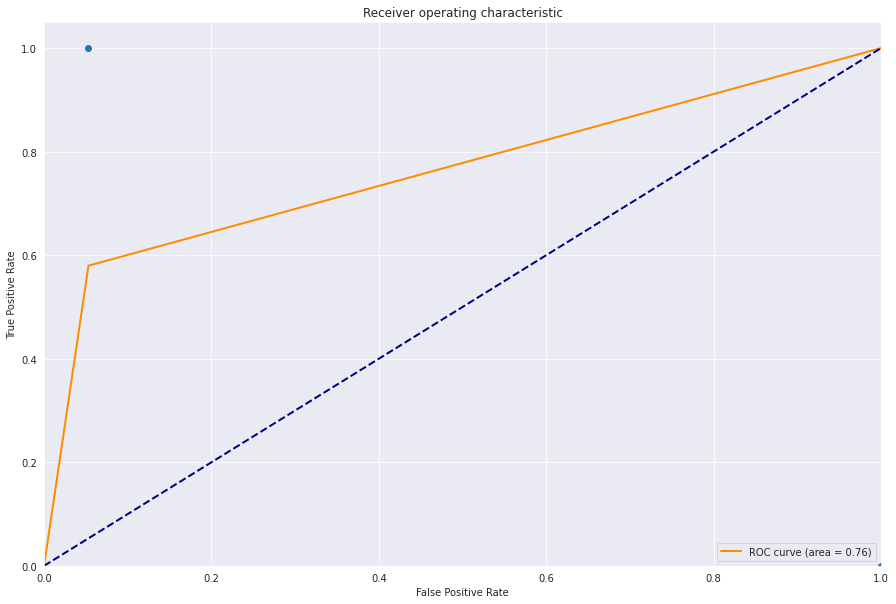

In [ ]:
preprocessing.report(model_rfr, X_train, y_train, X_test, y_test)

In [ ]:
pred_rfr = model_rfr.predict(X_test)

Cantidad de árboles entrenados:

In [ ]:
len(model_rfr.estimators_)


100

Veamos el primero de ellos:

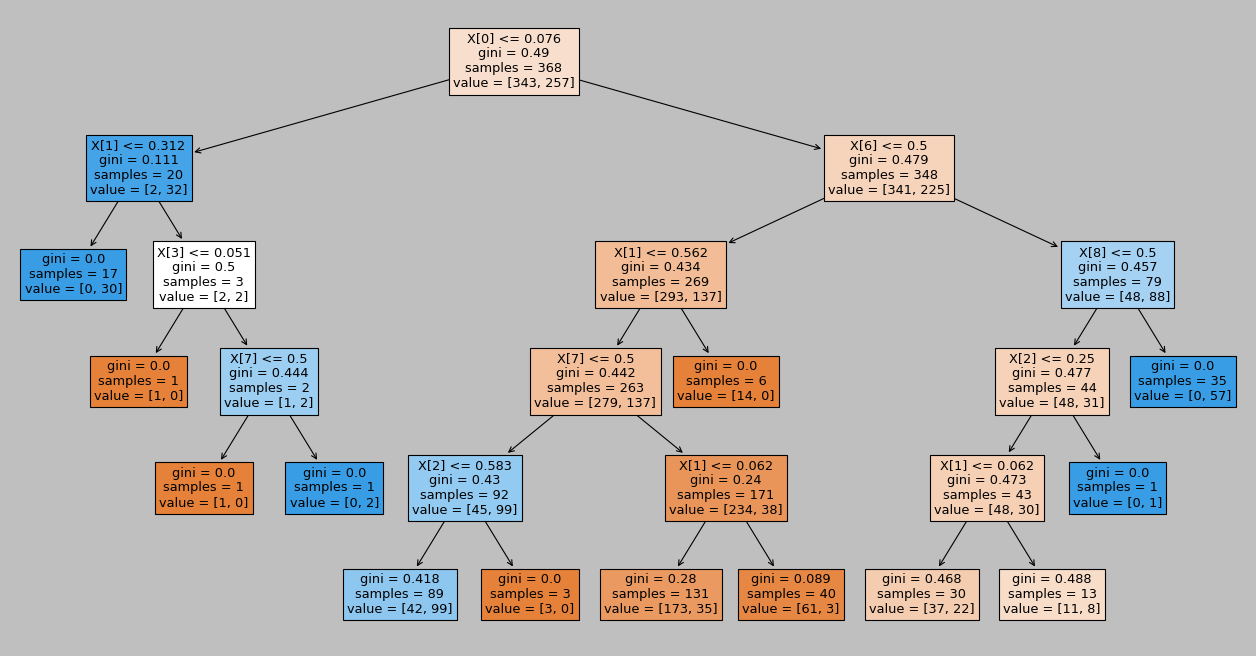

In [ ]:
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(model_rfr.estimators_[0], filled=True)

Y sus métricas:

In [ ]:
pred_first_estimator = model_rfr.estimators_[0].predict(X_test)
accuracy_score(y_test, pred_first_estimator)

0.8159203980099502

In [ ]:
precision_score(y_test, pred_first_estimator)

0.7352941176470589

In [ ]:
recall_score(y_test, pred_first_estimator)

0.7246376811594203

In [ ]:
f1_score(y_test, pred_first_estimator)

0.7299270072992701

In [ ]:
pred_estimators = [
    estimator.predict(X_test) for estimator in model_rfr.estimators_
]
acc_estimators = [accuracy_score(y_test, pred) for pred in pred_estimators]


Text(0.5, 1.0, 'Histograma de accuracy de los arboles del RF model')

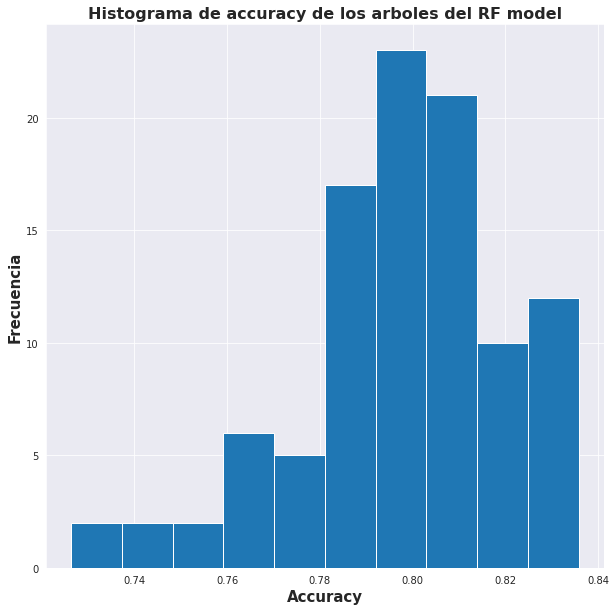

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(acc_estimators)
plt.xlabel("Accuracy", weight="bold", fontsize=15)
plt.ylabel("Frecuencia", weight="bold", fontsize=15)
plt.title(
    "Histograma de accuracy de los arboles del RF model", weight="bold", fontsize=16
)


In [ ]:
max(acc_estimators)

0.835820895522388

In [ ]:
min(acc_estimators)

0.7263681592039801